## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
# Display the data table for preview
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Display the data table for preview
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Checking the number of mice.
mice_no = len(mouse_metadata["Mouse ID"])
mouse_results_no = len(study_results["Mouse ID"])
print("Mice N = "+str(mice_no))
print("Mouse Results n = "+ str(mouse_results_no))

Mice N = 249
Mouse Results n = 1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_results_df = pd.DataFrame(study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)])
print(duplicate_mouse_results_df)
duplicates_to_remove = (len(duplicate_mouse_results_df))
print("Total duplicated results to be removed = "+ str(duplicates_to_remove))

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
107      g989          0           45.000000                 0
137      g989          0           45.000000                 0
329      g989          5           48.786801                 0
360      g989          5           47.570392                 0
620      g989         10           51.745156                 0
681      g989         10           49.880528                 0
815      g989         15           51.325852                 1
869      g989         15           53.442020                 0
950      g989         20           55.326122                 1
1111     g989         20           54.657650                 1
Total duplicated results to be removed = 10


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# export duplicate results DataFrame to a new CSV file
duplicate_mouse_results_df.to_csv("../Images/duplicate_results.csv", index=False, header=True)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop duplicates should be that mouse results are n=1893-10=1883
clean_study_results= study_results.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)
print("Study results with duplicates removed = "+str(len(clean_study_results)))

Study results with duplicates removed = 1883


In [8]:
# Combine the data into a single dataset and check lenght is correct n=1883
mouse_study_df = pd.merge(left= mouse_metadata, right= clean_study_results, how="inner")
print(len(mouse_study_df))

1883


In [9]:
# Display the data table for preview head
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
#rename the tumour vol headers
mouse_study_tumors_df = mouse_study_df.rename(columns={"mouse ID":"Mouse_ID",
                                                       "Tumor Volume (mm3)":"Tumor_Vol",
                                                       "Drug Regimen":"Drug_Regimen"})
mouse_study_tumors_df

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Vol,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [11]:
#get names of each drug in study
mouse_study_tumors_df.Drug_Regimen.unique()


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [12]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen
#use loc to filter for each drug

#ramicane arm summary stats
ramicane_arm_df = mouse_study_tumors_df.loc[
    mouse_study_tumors_df["Drug_Regimen"]=="Ramicane", :]
ramicane_arm_mean = round(ramicane_arm_df["Tumor_Vol"].mean(),2)
print ("Ramicane Tumor Volume Mean = "+str(ramicane_arm_mean))
ramicane_arm_median = round(ramicane_arm_df["Tumor_Vol"].median(),2)
print ("Ramicane Tumor Volume Median = "+str(ramicane_arm_median))
ramicane_arm_SD = round(ramicane_arm_df["Tumor_Vol"].std(),2)
print ("Ramicane Tumor Volume Std Dev = "+str(ramicane_arm_SD))
ramicane_arm_var = round(ramicane_arm_df["Tumor_Vol"].var(),2)
print ("Ramicane Tumor Volume Variance = "+str(ramicane_arm_var))
ramicane_arm_sem = round(ramicane_arm_df["Tumor_Vol"].sem(),2)
print ("Ramicane Tumor Volume Std Error = "+str(ramicane_arm_sem))

#Capomulin arm summary stats
capomulin_arm_df = mouse_study_tumors_df.loc[
    mouse_study_tumors_df["Drug_Regimen"]=="Capomulin", :]
capomulin_arm_mean = round(capomulin_arm_df["Tumor_Vol"].mean(),2)
print ("Capomulin Tumor Volume Mean = "+str(capomulin_arm_mean))
capomulin_arm_median = round(capomulin_arm_df["Tumor_Vol"].median(),2)
print ("Capomulin Tumor Volume Median = "+str(capomulin_arm_median))
capomulin_arm_SD = round(capomulin_arm_df["Tumor_Vol"].std(),2)
print ("Capomulin Tumor Volume Std Dev = "+str(capomulin_arm_SD))
capomulin_arm_var = round(capomulin_arm_df["Tumor_Vol"].var(),2)
print ("Capomulin Tumor Volume Variance = "+str(capomulin_arm_var))
capomulin_arm_sem = round(capomulin_arm_df["Tumor_Vol"].sem(),2)
print ("Capomulin Tumor Volume Std Error = "+str(capomulin_arm_sem))
#Infubinol arm summary stats
infubinol_arm_df = mouse_study_tumors_df.loc[
    mouse_study_tumors_df["Drug_Regimen"]=="Infubinol", :]
infubinol_arm_mean = round(infubinol_arm_df["Tumor_Vol"].mean(),2)
print ("Infubinol Tumor Volume Mean = "+str(infubinol_arm_mean))
infubinol_arm_median = round(infubinol_arm_df["Tumor_Vol"].median(),2)
print ("Infubinol Tumor Volume Median = "+str(infubinol_arm_median))
infubinol_arm_SD = round(infubinol_arm_df["Tumor_Vol"].std(),2)
print ("Infubinol Tumor Volume Std Dev = "+str(infubinol_arm_SD))
infubinol_arm_var = round(infubinol_arm_df["Tumor_Vol"].var(),2)
print ("Infubinol Tumor Volume Variance = "+str(infubinol_arm_var))
infubinol_arm_sem = round(infubinol_arm_df["Tumor_Vol"].sem(),2)
print ("Infubinol Tumor Volume Std Error = "+str(infubinol_arm_sem))
#Placebo arm summary stats 
placebo_arm_df = mouse_study_tumors_df.loc[
    mouse_study_tumors_df["Drug_Regimen"]=="Placebo", :]
placebo_arm_mean = round(placebo_arm_df["Tumor_Vol"].mean(),2)
print ("Placebo Tumor Volume Mean = "+str(placebo_arm_mean))
placebo_arm_median = round(placebo_arm_df["Tumor_Vol"].median(),2)
print ("Placebo Tumor Volume Median = "+str(placebo_arm_median))
placebo_arm_SD = round(placebo_arm_df["Tumor_Vol"].std(),2)
print ("Placebo Tumor Volume Std Dev = "+str(placebo_arm_SD))
placebo_arm_var = round(placebo_arm_df["Tumor_Vol"].var(),2)
print ("Placebo Tumor Volume Variance = "+str(placebo_arm_var))
placebo_arm_sem = round(placebo_arm_df["Tumor_Vol"].sem(),2)
print ("Placebo Tumor Volume Std Error = "+str(placebo_arm_sem))
#Ceftamin arm summary stats
ceftamin_arm_df = mouse_study_tumors_df.loc[
    mouse_study_tumors_df["Drug_Regimen"]=="Ceftamin", :]
ceftamin_arm_mean = round(ceftamin_arm_df["Tumor_Vol"].mean(),2)
print ("Ceftamin Tumor Volume Mean = "+str(ceftamin_arm_mean))
ceftamin_arm_median = round(ceftamin_arm_df["Tumor_Vol"].median(),2)
print ("Ceftamin Tumor Volume Median = "+str(ceftamin_arm_median))
ceftamin_arm_SD = round(ceftamin_arm_df["Tumor_Vol"].std(),2)
print ("Ceftamin Tumor Volume Std Dev = "+str(ceftamin_arm_SD))
ceftamin_arm_var = round(ceftamin_arm_df["Tumor_Vol"].var(),2)
print ("Ceftamin Tumor Volume Variance = "+str(ceftamin_arm_var))
ceftamin_arm_sem = round(ceftamin_arm_df["Tumor_Vol"].sem(),2)
print ("Ceftamin Tumor Volume Std Error = "+str(ceftamin_arm_sem))
#Stelasyn arm summary stats 
stelasyn_arm_df = mouse_study_tumors_df.loc[
    mouse_study_tumors_df["Drug_Regimen"]=="Stelasyn", :]
stelasyn_arm_mean = round(stelasyn_arm_df["Tumor_Vol"].mean(),2)
print ("Stelasyn Tumor Volume Mean = "+str(stelasyn_arm_mean))
stelasyn_arm_median = round(stelasyn_arm_df["Tumor_Vol"].median(),2)
print ("Stelasyn Tumor Volume Median = "+str(stelasyn_arm_median))
stelasyn_arm_SD = round(stelasyn_arm_df["Tumor_Vol"].std(),2)
print ("Stelasyn Tumor Volume Std Dev = "+str(stelasyn_arm_SD))
stelasyn_arm_var = round(stelasyn_arm_df["Tumor_Vol"].var(),2)
print ("Stelasyn Tumor Volume Variance = "+str(stelasyn_arm_var))
stelasyn_arm_sem = round(stelasyn_arm_df["Tumor_Vol"].sem(),2)
print ("Stelasyn Tumor Volume Std Error = "+str(stelasyn_arm_sem))
#Zoniferol arm summary stats 
zoniferol_arm_df = mouse_study_tumors_df.loc[
    mouse_study_tumors_df["Drug_Regimen"]=="Zoniferol", :]
zoniferol_arm_mean = round(zoniferol_arm_df["Tumor_Vol"].mean(),2)
print ("Zoniferol Tumor Volume Mean = "+str(zoniferol_arm_mean))
zoniferol_arm_median = round(zoniferol_arm_df["Tumor_Vol"].median(),2)
print ("Zoniferol Tumor Volume Median = "+str(zoniferol_arm_median))
zoniferol_arm_SD = round(zoniferol_arm_df["Tumor_Vol"].std(),2)
print ("Zoniferol Tumor Volume Std Dev = "+str(zoniferol_arm_SD))
zoniferol_arm_var = round(zoniferol_arm_df["Tumor_Vol"].var(),2)
print ("Zoniferol Tumor Volume Variance = "+str(zoniferol_arm_var))
zoniferol_arm_sem = round(zoniferol_arm_df["Tumor_Vol"].sem(),2)
print ("Zoniferol Tumor Volume Std Error = "+str(zoniferol_arm_sem))
#Ketapril arm summary stats 
ketapril_arm_df = mouse_study_tumors_df.loc[
    mouse_study_tumors_df["Drug_Regimen"]=="Ketapril", :]
ketapril_arm_mean = round(ketapril_arm_df["Tumor_Vol"].mean(),2)
print ("Ketapril Tumor Volume Mean = "+str(ketapril_arm_mean))
ketapril_arm_median = round(ketapril_arm_df["Tumor_Vol"].median(),2)
print ("Ketapril Tumor Volume Median = "+str(ketapril_arm_median))
ketapril_arm_SD = round(ketapril_arm_df["Tumor_Vol"].std(),2)
print ("Ketapril Tumor Volume Std Dev = "+str(ketapril_arm_SD))
ketapril_arm_var = round(ketapril_arm_df["Tumor_Vol"].var(),2)
print ("Ketapril Tumor Volume Variance = "+str(ketapril_arm_var))
ketapril_arm_sem = round(ketapril_arm_df["Tumor_Vol"].sem(),2)
print ("ketapril Tumor Volume Std Error = "+str(ketapril_arm_sem))
#Propriva arm summary stats
propriva_arm_df = mouse_study_tumors_df.loc[
    mouse_study_tumors_df["Drug_Regimen"]=="Propriva", :]
propriva_arm_mean = round(propriva_arm_df["Tumor_Vol"].mean(),2)
print ("Propriva Tumor Volume Mean = "+str(propriva_arm_mean))
propriva_arm_median = round(propriva_arm_df["Tumor_Vol"].median(),2)
print ("Propriva Tumor Volume Median = "+str(propriva_arm_median))
propriva_arm_SD = round(propriva_arm_df["Tumor_Vol"].std(),2)
print ("Propriva Tumor Volume Std Dev = "+str(propriva_arm_SD))
propriva_arm_var = round(propriva_arm_df["Tumor_Vol"].var(),2)
print ("Propriva Tumor Volume Variance = "+str(propriva_arm_var))
propriva_arm_sem = round(propriva_arm_df["Tumor_Vol"].sem(),2)
print ("Propriva Tumor Volume Std Error = "+str(propriva_arm_sem))
#Naftisol arm summary stats
naftisol_arm_df = mouse_study_tumors_df.loc[
    mouse_study_tumors_df["Drug_Regimen"]=="Naftisol", :]
naftisol_arm_mean = round(naftisol_arm_df["Tumor_Vol"].mean(),2)
print ("Naftisol Tumor Volume Mean = "+str(naftisol_arm_mean))
naftisol_arm_median = round(naftisol_arm_df["Tumor_Vol"].median(),2)
print ("Naftisol Tumor Volume Median = "+str(naftisol_arm_median))
naftisol_arm_SD = round(naftisol_arm_df["Tumor_Vol"].std(),2)
print ("Naftisol Tumor Volume Std Dev = "+str(naftisol_arm_SD))
naftisol_arm_var = round(naftisol_arm_df["Tumor_Vol"].var(),2)
print ("Naftisol Tumor Volume Variance = "+str(naftisol_arm_var))
naftisol_arm_sem = round(naftisol_arm_df["Tumor_Vol"].sem(),2)
print ("Naftisol Tumor Volume Std Error = "+str(naftisol_arm_sem))



Ramicane Tumor Volume Mean = 40.22
Ramicane Tumor Volume Median = 40.67
Ramicane Tumor Volume Std Dev = 4.85
Ramicane Tumor Volume Variance = 23.49
Ramicane Tumor Volume Std Error = 0.32
Capomulin Tumor Volume Mean = 40.68
Capomulin Tumor Volume Median = 41.56
Capomulin Tumor Volume Std Dev = 4.99
Capomulin Tumor Volume Variance = 24.95
Capomulin Tumor Volume Std Error = 0.33
Infubinol Tumor Volume Mean = 52.88
Infubinol Tumor Volume Median = 51.82
Infubinol Tumor Volume Std Dev = 6.57
Infubinol Tumor Volume Variance = 43.13
Infubinol Tumor Volume Std Error = 0.49
Placebo Tumor Volume Mean = 54.03
Placebo Tumor Volume Median = 52.29
Placebo Tumor Volume Std Dev = 7.82
Placebo Tumor Volume Variance = 61.17
Placebo Tumor Volume Std Error = 0.58
Ceftamin Tumor Volume Mean = 52.59
Ceftamin Tumor Volume Median = 51.78
Ceftamin Tumor Volume Std Dev = 6.27
Ceftamin Tumor Volume Variance = 39.29
Ceftamin Tumor Volume Std Error = 0.47
Stelasyn Tumor Volume Mean = 54.23
Stelasyn Tumor Volume Med

In [13]:
#create pivot to diplay summary stats
drug_pivot = pd.pivot_table(mouse_study_tumors_df, 
                              values=['Tumor_Vol'], index=["Drug_Regimen"],
                              aggfunc={'Tumor_Vol':[len, 
                                                    np.mean, 
                                                    np.median, 
                                                    np.std, 
                                                    np.var, 
                                                    st.sem]
                                      })
drug_pivot_df = drug_pivot
drug_pivot_df

Tumor_Vol                                                     
                   len       mean     median       sem       std        var
Drug_Regimen                                                               
Capomulin        230.0  40.675741  41.557809  0.329346  4.994774  24.947764
Ceftamin         178.0  52.591172  51.776157  0.469821  6.268188  39.290177
Infubinol        178.0  52.884795  51.820584  0.492236  6.567243  43.128684
Ketapril         188.0  55.235638  53.698743  0.603860  8.279709  68.553577
Naftisol         186.0  54.331565  52.509285  0.596466  8.134708  66.173479
Placebo          181.0  54.033581  52.288934  0.581331  7.821003  61.168083
Propriva         151.0  52.458254  50.854632  0.540135  6.637293  44.053659
Ramicane         228.0  40.216745  40.673236  0.320955  4.846308  23.486704
Stelasyn         181.0  54.233149  52.431737  0.573111  7.710419  59.450562
Zoniferol        182.0  53.236507  51.818479  0.516398  6.966589  48.533355

In [14]:
# Use map and join to coalesce column headers in pivot data frame
drug_pivot_df.columns = list(map("_".join, drug_pivot_df.columns))
drug_pivot_df

,Tumor_Vol_len,Tumor_Vol_mean,Tumor_Vol_median,Tumor_Vol_sem,Tumor_Vol_std,Tumor_Vol_var
Drug_Regimen,,,,,,
Capomulin,230.0,40.675741,41.557809,0.329346,4.994774,24.947764
Ceftamin,178.0,52.591172,51.776157,0.469821,6.268188,39.290177
Infubinol,178.0,52.884795,51.820584,0.492236,6.567243,43.128684
Ketapril,188.0,55.235638,53.698743,0.603860,8.279709,68.553577
Naftisol,186.0,54.331565,52.509285,0.596466,8.134708,66.173479
Placebo,181.0,54.033581,52.288934,0.581331,7.821003,61.168083
Propriva,151.0,52.458254,50.854632,0.540135,6.637293,44.053659
Ramicane,228.0,40.216745,40.673236,0.320955,4.846308,23.486704
Stelasyn,181.0,54.233149,52.431737,0.573111,7.710419,59.450562


In [15]:
#get unique column headings from pivot
drug_pivot_df.columns.unique()

Index(['Tumor_Vol_len', 'Tumor_Vol_mean', 'Tumor_Vol_median', 'Tumor_Vol_sem',
       'Tumor_Vol_std', 'Tumor_Vol_var'],
      dtype='object')

In [16]:
# rename pivot table headers
drug_pivot_rename_df=drug_pivot_df.rename(columns={'Tumor_Vol_len':'Number_Tumor_Volume_Measured', 'Tumor_Vol_mean':'Tumor_Volume_Mean',
       'Tumor_Vol_median':"Tumor_Volume_Median", 'Tumor_Vol_sem':"Tumor_Volume_St_Error",
       'Tumor_Vol_std':"Tumor_Volume_SD", "Tumor_Vol_var":"Tumor_Volume_Variance"})
drug_pivot_rename_df

,Number_Tumor_Volume_Measured,Tumor_Volume_Mean,Tumor_Volume_Median,Tumor_Volume_St_Error,Tumor_Volume_SD,Tumor_Volume_Variance
Drug_Regimen,,,,,,
Capomulin,230.0,40.675741,41.557809,0.329346,4.994774,24.947764
Ceftamin,178.0,52.591172,51.776157,0.469821,6.268188,39.290177
Infubinol,178.0,52.884795,51.820584,0.492236,6.567243,43.128684
Ketapril,188.0,55.235638,53.698743,0.603860,8.279709,68.553577
Naftisol,186.0,54.331565,52.509285,0.596466,8.134708,66.173479
Placebo,181.0,54.033581,52.288934,0.581331,7.821003,61.168083
Propriva,151.0,52.458254,50.854632,0.540135,6.637293,44.053659
Ramicane,228.0,40.216745,40.673236,0.320955,4.846308,23.486704
Stelasyn,181.0,54.233149,52.431737,0.573111,7.710419,59.450562


In [17]:
#give the displayed data cleaner formatting
drug_pivot_rename_df["Number_Tumor_Volume_Measured"]=drug_pivot_rename_df["Number_Tumor_Volume_Measured"].astype(str).replace('\.0', '', regex=True)
drug_pivot_rename_df["Tumor_Volume_Mean"]=round(drug_pivot_rename_df["Tumor_Volume_Mean"],2)
drug_pivot_rename_df["Tumor_Volume_Median"]=round(drug_pivot_rename_df["Tumor_Volume_Median"],2)
drug_pivot_rename_df["Tumor_Volume_St_Error"]=round(drug_pivot_rename_df["Tumor_Volume_St_Error"],2)
drug_pivot_rename_df["Tumor_Volume_SD"]=round(drug_pivot_rename_df["Tumor_Volume_SD"],2)
drug_pivot_rename_df["Tumor_Volume_Variance"]=round(drug_pivot_rename_df["Tumor_Volume_Variance"],2)
drug_pivot_rename_df        


,Number_Tumor_Volume_Measured,Tumor_Volume_Mean,Tumor_Volume_Median,Tumor_Volume_St_Error,Tumor_Volume_SD,Tumor_Volume_Variance
Drug_Regimen,,,,,,
Capomulin,230,40.68,41.56,0.33,4.99,24.95
Ceftamin,178,52.59,51.78,0.47,6.27,39.29
Infubinol,178,52.88,51.82,0.49,6.57,43.13
Ketapril,188,55.24,53.70,0.60,8.28,68.55
Naftisol,186,54.33,52.51,0.60,8.13,66.17
Placebo,181,54.03,52.29,0.58,7.82,61.17
Propriva,151,52.46,50.85,0.54,6.64,44.05
Ramicane,228,40.22,40.67,0.32,4.85,23.49
Stelasyn,181,54.23,52.43,0.57,7.71,59.45


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
regimen_groups = mouse_study_tumors_df.groupby("Drug_Regimen")
tumor_vol_grp_mean = round(regimen_groups["Tumor_Vol"].mean(),2)
tumor_vol_grp_median = round(regimen_groups["Tumor_Vol"].median(),2)
tumor_vol_grp_var = round(regimen_groups["Tumor_Vol"].var(),2)
tumor_vol_grp_sd = round(regimen_groups["Tumor_Vol"].std(),2)
tumor_vol_grp_sem = round(regimen_groups["Tumor_Vol"].sem(),2)

print("Mean "+str(tumor_vol_grp_mean))
print("Median "+str(tumor_vol_grp_median))
print("SD "+str(tumor_vol_grp_sd))
print("Variance "+str(tumor_vol_grp_var))
print("Std Error "+str(tumor_vol_grp_sem))


Mean Drug_Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.46
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor_Vol, dtype: float64
Median Drug_Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.85
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Tumor_Vol, dtype: float64
SD Drug_Regimen
Capomulin    4.99
Ceftamin     6.27
Infubinol    6.57
Ketapril     8.28
Naftisol     8.13
Placebo      7.82
Propriva     6.64
Ramicane     4.85
Stelasyn     7.71
Zoniferol    6.97
Name: Tumor_Vol, dtype: float64
Variance Drug_Regimen
Capomulin    24.95
Ceftamin     39.29
Infubinol    43.13
Ketapril     68.55
Naftisol     66.17
Placebo      61.17
Propriva     44.05
Ramicane     23.49
Stelasyn     59.45
Zoniferol    48.53
Name: Tumor_Vol, dtype: float64
Std Error Drug_Regimen
Capomulin    0.33
Cefta

In [19]:
print(regimen_groups["Tumor_Vol"].describe())

              count       mean       std        min        25%        50%  \
Drug_Regimen                                                                
Capomulin     230.0  40.675741  4.994774  23.343598  37.685933  41.557809   
Ceftamin      178.0  52.591172  6.268188  45.000000  47.208427  51.776157   
Infubinol     178.0  52.884795  6.567243  36.321346  47.312353  51.820584   
Ketapril      188.0  55.235638  8.279709  45.000000  48.232987  53.698743   
Naftisol      186.0  54.331565  8.134708  45.000000  47.285874  52.509285   
Placebo       181.0  54.033581  7.821003  45.000000  47.459053  52.288934   
Propriva      151.0  52.458254  6.637293  45.000000  47.011050  50.854632   
Ramicane      228.0  40.216745  4.846308  22.050126  36.674635  40.673236   
Stelasyn      181.0  54.233149  7.710419  45.000000  48.047139  52.431737   
Zoniferol     182.0  53.236507  6.966589  45.000000  47.337876  51.818479   

                    75%        max  
Drug_Regimen                        
C

## Bar and Pie Charts

In [20]:
# mice grouped by drug regimen 
mouse_drug_groups = mouse_metadata.groupby("Drug Regimen")
mouse_drug_counts = mouse_drug_groups.count()

mouse_drug_counts


,Mouse ID,Sex,Age_months,Weight (g)
Drug Regimen,,,,
Capomulin,25,25,25,25
Ceftamin,25,25,25,25
Infubinol,25,25,25,25
Ketapril,25,25,25,25
Naftisol,25,25,25,25
Placebo,25,25,25,25
Propriva,25,25,25,25
Ramicane,25,25,25,25
Stelasyn,24,24,24,24


In [21]:
#create a data frame for the count of mice by drug data
mice_drug_arm_df = pd.DataFrame(mouse_drug_counts, columns = ["Mouse ID"])
#rename mouse id to mice
mice_drug_arm_df = mice_drug_arm_df.rename(columns = {"Mouse ID":"Mice"})
mice_drug_arm_df


,Mice
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


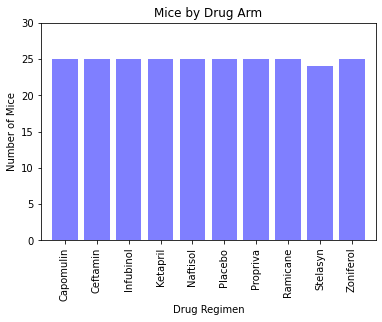

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas . 
mice = mice_drug_arm_df["Mice"].tolist()
x_axis = np.arange(len(mice))
drugs = mice_drug_arm_df.index.tolist()
plt.bar(x_axis, mice, color='b', alpha=0.5, align="center")
# Add x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drugs, rotation ='vertical')

# add labels
plt.title("Mice by Drug Arm")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(mice)-.25)
plt.ylim(0, max(mice) + 5)
plt.show()


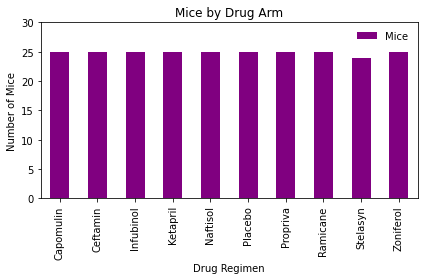

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_drug_arm_df.plot(kind="bar", facecolor="purple")
plt.title("Mice by Drug Arm")
plt.ylabel ("Number of Mice")
plt.xlabel ("Drug Regimen")
plt.ylim(0, max(mice)+5)
plt.tight_layout()
plt.legend(loc='upper right', frameon=False)
plt.show()

In [24]:
# mice grouped by sex
mouse_sex_groups = mouse_metadata.groupby("Sex")
mouse_sex_counts = mouse_sex_groups.count()

mouse_sex_counts


,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


In [25]:
#create a data frame for the count of mice by sex
mice_sex_df = pd.DataFrame(mouse_sex_counts, columns = ["Mouse ID"])
#rename mouse id to mice
mice_sex_df = mice_sex_df.rename(columns = {"Mouse ID":"Mice"})
mice_sex_df

,Mice
Sex,
Female,124
Male,125


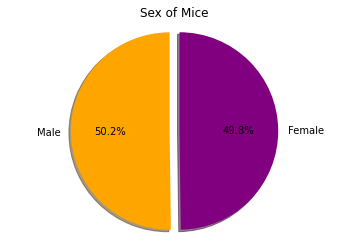

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = ["Male","Female"]
mice_n = [125, 124]

colors = ["orange","purple"]
explode = (0.1,0)

plt.title("Sex of Mice")
plt.pie(mice_n, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


Text(0, 0.5, '')

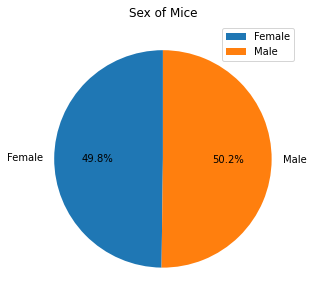

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex_df.plot.pie
pieplot = mice_sex_df.plot.pie(y='Mice', figsize=(5, 5),autopct="%1.1f%%",startangle=90)
plt.title("Sex of Mice")
plt.ylabel("")


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across 4 of the treatments
# Capomulin, Ramicane, Infubinol, and Ceftamin
# create data for 4 treatments
four_treatments= mouse_study_tumors_df[mouse_study_tumors_df["Drug_Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"]) ]
four_treatments_df = pd.DataFrame(four_treatments, columns = [""])


In [29]:
four_treatments_df = pd.DataFrame(four_treatments, columns = ["Mouse ID",
                                                              "Drug_Regimen",
                                                              "Sex",
                                                              "Age_months",
                                                              "Weight (g)",
                                                              "Timepoint",
                                                              "Tumor_Vol",
                                                              "Metastatic Sites"])
#sort four_treatments_df to make sure that it runs from smallest to largest timepoint for each mouse
four_treatments_df= four_treatments_df.sort_values("Timepoint", ascending=True)

# To sort from highest to lowest, ascending=False must be passed in
#freedom_df = happiness_df.sort_values("Freedom", ascending=False)

four_treatments_df

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Vol,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1381,q132,Infubinol,Female,1,30,0,45.000000,0
195,i738,Capomulin,Female,23,20,0,45.000000,0
205,a520,Ramicane,Male,13,21,0,45.000000,0
1360,p438,Ceftamin,Female,11,26,0,45.000000,0
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [30]:
# Calculate the final tumor volume of each mouse across 4 of the treatments
# Capomulin, Ramicane, Infubinol, and Ceftamin
# get first and last mouse data
mouse_first = four_treatments_df.drop_duplicates(subset=['Mouse ID',
                                                         "Drug_Regimen"], 
                                                 keep='first')
print(len(mouse_first))

mouse_last = four_treatments_df.drop_duplicates(subset=['Mouse ID',
                                                         "Drug_Regimen"], 
                                                 keep='last')
print(len(mouse_last))
#df.drop_duplicates(subset=['brand', 'style'], keep='last')
first_last_merge=pd.merge(mouse_first, mouse_last, on="Mouse ID", 
                               how="inner") 
first_last_merge

100
100


,Mouse ID,Drug_Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor_Vol_x,Metastatic Sites_x,Drug_Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor_Vol_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.0,0,Ramicane,Male,21,16,45,22.050126,1
1,q132,Infubinol,Female,1,30,0,45.0,0,Infubinol,Female,1,30,30,54.656549,4
2,i738,Capomulin,Female,23,20,0,45.0,0,Capomulin,Female,23,20,45,37.311846,2
3,a520,Ramicane,Male,13,21,0,45.0,0,Ramicane,Male,13,21,45,38.810366,1
4,p438,Ceftamin,Female,11,26,0,45.0,0,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,z578,Ramicane,Male,11,16,0,45.0,0,Ramicane,Male,11,16,45,30.638696,0
96,y769,Ceftamin,Female,6,27,0,45.0,0,Ceftamin,Female,6,27,45,68.594745,4
97,m546,Ramicane,Male,18,16,0,45.0,0,Ramicane,Male,18,16,45,30.564625,1
98,x401,Capomulin,Female,16,15,0,45.0,0,Capomulin,Female,16,15,45,28.484033,0


In [31]:
#display merges data column names
first_last_merge.columns

Index(['Mouse ID', 'Drug_Regimen_x', 'Sex_x', 'Age_months_x', 'Weight (g)_x',
       'Timepoint_x', 'Tumor_Vol_x', 'Metastatic Sites_x', 'Drug_Regimen_y',
       'Sex_y', 'Age_months_y', 'Weight (g)_y', 'Timepoint_y', 'Tumor_Vol_y',
       'Metastatic Sites_y'],
      dtype='object')

In [32]:
#create pared down dataframe from merged data
treat_compare_df = pd.DataFrame(first_last_merge, columns = ['Mouse ID', 
                                                             'Drug_Regimen_x', 
                                                             'Sex_x', 
                                                             'Age_months_x', 
                                                             'Weight (g)_x',
                                                             'Tumor_Vol_x', 
                                                             'Metastatic Sites_x',
                                                             'Tumor_Vol_y'])
treat_compare_df=treat_compare_df.rename(columns={"Drug_Regimen_x":"Drug_Regimen",
                                                 "Sex_x":"Sex",
                                                "Age_months_x":"Age_months",
                                                 "Weight (g)_x":"Weight_(g)",
                                                 "Tumor_Vol_x":"Tumor_Volume_First",
                                                 "Metastatic Sites_x":"Metastatic_Sites",
                                                 "Tumor_Vol_y":"Tumor_Volume_Last"})




treat_compare_df

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight_(g),Tumor_Volume_First,Metastatic_Sites,Tumor_Volume_Last
0,k403,Ramicane,Male,21,16,45.0,0,22.050126
1,q132,Infubinol,Female,1,30,45.0,0,54.656549
2,i738,Capomulin,Female,23,20,45.0,0,37.311846
3,a520,Ramicane,Male,13,21,45.0,0,38.810366
4,p438,Ceftamin,Female,11,26,45.0,0,61.433892
...,...,...,...,...,...,...,...,...
95,z578,Ramicane,Male,11,16,45.0,0,30.638696
96,y769,Ceftamin,Female,6,27,45.0,0,68.594745
97,m546,Ramicane,Male,18,16,45.0,0,30.564625
98,x401,Capomulin,Female,16,15,45.0,0,28.484033


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
first= treat_compare_df["Tumor_Volume_First"].tolist()
last= treat_compare_df["Tumor_Volume_Last"].tolist()

# Create empty list to fill with tumor vol data (for plotting)
change_vol=[]
for row in last:
    change = row-45
    change_vol.append(change)


In [34]:
#add change vol to compare data
treat_compare_df["Tumor_Volume_Change"]=change_vol
treat_compare_df


,Mouse ID,Drug_Regimen,Sex,Age_months,Weight_(g),Tumor_Volume_First,Metastatic_Sites,Tumor_Volume_Last,Tumor_Volume_Change
0,k403,Ramicane,Male,21,16,45.0,0,22.050126,-22.949874
1,q132,Infubinol,Female,1,30,45.0,0,54.656549,9.656549
2,i738,Capomulin,Female,23,20,45.0,0,37.311846,-7.688154
3,a520,Ramicane,Male,13,21,45.0,0,38.810366,-6.189634
4,p438,Ceftamin,Female,11,26,45.0,0,61.433892,16.433892
...,...,...,...,...,...,...,...,...,...
95,z578,Ramicane,Male,11,16,45.0,0,30.638696,-14.361304
96,y769,Ceftamin,Female,6,27,45.0,0,68.594745,23.594745
97,m546,Ramicane,Male,18,16,45.0,0,30.564625,-14.435375
98,x401,Capomulin,Female,16,15,45.0,0,28.484033,-16.515967


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
median_last = round(treat_compare_df["Tumor_Volume_Last"].median(),2)
print(f"Median last tumor measure across 4 treatments is calculated as: {median_last}")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
# If the data is in a dataframe, we use pandas to give quartile calculations
med = round(np.quantile(last,0.5),2)
lowerqrt = round(np.quantile(last,0.25),2)
upperqrt = round(np.quantile(last,0.75),2)
iqr = round((upperqrt-lowerqrt),2)

print(f"The lower quartile of Final Volume is: {lowerqrt}")
print(f"The upper quartile of Final Volume is: {upperqrt}")
print(f"The interquartile range of Final Volume is: {iqr}")
print(f"The the median of Final Volume is: {med} ")
  # Determine outliers using upper and lower bounds
lower_bound = round(lowerqrt - (1.5*iqr),2)
upper_bound = round(upperqrt + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Median last tumor measure across 4 treatments is calculated as: 45.0
The lower quartile of Final Volume is: 37.19
The upper quartile of Final Volume is: 59.93
The interquartile range of Final Volume is: 22.74
The the median of Final Volume is: 45.0 
Values below 3.08 could be outliers.
Values above 94.04 could be outliers.


In [36]:
# Sort to check for outliers
outlier_check = last
outlier_check.sort()
print(outlier_check)

[22.05012627, 23.34359787, 28.43096411, 28.48403281, 29.12847181, 30.27623175, 30.48598484, 30.56462509, 30.63869575, 31.02392294, 31.09533505, 31.56046955, 31.896238399999998, 32.37735684, 32.97852192, 33.32909778, 33.39765251, 33.56240217, 34.45529799, 36.04104736, 36.13485243, 36.321345799999996, 36.37451039, 36.56165229, 37.07402422, 37.22565033, 37.31123552, 37.31184577, 38.125164399999996, 38.34200823, 38.407618299999996, 38.75326548, 38.81036633, 38.84687569, 38.93963263, 38.98287774, 39.95234669, 40.1592203, 40.65812366, 40.65900627, 40.66771292, 40.72857787, 41.48300765, 41.58152074, 43.04754260000001, 43.16637266, 43.41938077, 44.18345092, 45.0, 45.0, 45.0, 45.0, 45.22086888, 45.69933088, 46.25011212, 46.53920617, 46.78453491, 47.01036401, 47.68596303, 47.784681799999994, 48.72207785, 50.00513807, 51.54243058, 52.92534846, 54.04860769, 54.65654872, 55.62942846, 55.65068132, 55.74282869, 56.05774909, 57.03186187, 57.91838132, 58.26844248, 59.74190064, 59.85195552, 60.16518046,

In [37]:
# add a for loop on above sort, to check if above or below bounds and return number of outliers
high_outlier=[]
low_outlier=[]

for outlier in outlier_check:
    if outlier <= lower_bound:
        low = outlier
        low_outlier.append(low)
        if outlier >= upper_bound:
            high = outlier
            high_outlier.append(high)
outliers = len(low_outlier)+len(high_outlier) 
print(f"Given the upper and lower bounds of the final tumor volume data, the number of outliers are: {outliers}")

Given the upper and lower bounds of the final tumor volume data, the number of outliers are: 0


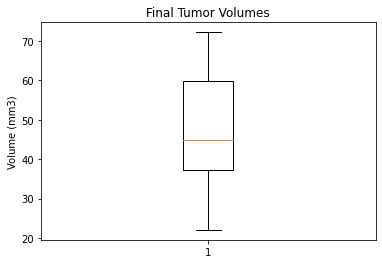

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(last)
plt.show()

## Line and Scatter Plots

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#random seed in a for loop to get mouse data and plot this data
mice_capomulin_list = capomulin_arm_df["Mouse ID"].tolist()
mice = len(mice_capomulin_list)
print(f"Number of data points for Capomulin mice: {mice}")


Number of data points for Capomulin mice: 230


In [40]:
random_mouse = random.randint(0, 230)
print (f"Mouse randomly picked for plotting is at index: {random_mouse}")

Mouse randomly picked for plotting is at index: 227


In [41]:
#create a dictionary for capo mice and df from this
dictofdata = { i : mice_capomulin_list[i] for i in range(0, len(mice_capomulin_list) ) }
Random_Mouse_Data_df = pd.DataFrame.from_dict(dictofdata, orient='index')
Random_Mouse_Data_df

,0
0,s185
1,s185
2,s185
3,s185
4,s185
...,...
225,i557
226,r157
227,r157
228,r157


In [42]:
#find random mouse id 
Random_mouse_id = Random_Mouse_Data_df.iloc[random_mouse]
print(f"Randomly selected Capomulin Mouse for plot is: {Random_mouse_id}")

Randomly selected Capomulin Mouse for plot is: 0    r157
Name: 227, dtype: object


In [43]:
#get data for randomly selected capomulin mouse
random_mouse_data = capomulin_arm_df.loc[capomulin_arm_df[
    "Mouse ID"]=="w914", :]
random_mouse_data


,Mouse ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Vol,Metastatic Sites
215,w914,Capomulin,Male,24,21,0,45.000000,0
216,w914,Capomulin,Male,24,21,5,45.893720,0
217,w914,Capomulin,Male,24,21,10,43.231963,0
218,w914,Capomulin,Male,24,21,15,43.688449,0
219,w914,Capomulin,Male,24,21,20,41.108092,0
220,w914,Capomulin,Male,24,21,25,40.291917,0
221,w914,Capomulin,Male,24,21,30,40.993110,0
222,w914,Capomulin,Male,24,21,35,41.664916,1
223,w914,Capomulin,Male,24,21,40,35.611309,2
224,w914,Capomulin,Male,24,21,45,36.041047,2


In [44]:
plot_mouse_tumor_vol = random_mouse_data["Tumor_Vol"].tolist()
plot_mouse_tumor_vol

[45.0,
 45.89372032,
 43.23196275,
 43.68844893,
 41.10809233,
 40.29191661,
 40.99311013,
 41.66491577,
 35.61130861,
 36.04104736]

Text(0, 0.5, 'Tumor Volume (mm3)')

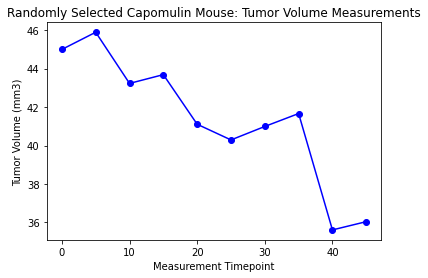

In [45]:
# create line plot of time point versus tumor volume for random capomulin mouse
#random_mouse_data
#mice_capomulin_list = capomulin_arm_df["Mouse ID"].tolist()
# Set x axis and variables
x_axis = (0, 5, 10, 15, 20, 25, 30, 35, 40, 45)
y_axis = (45.0,45.89372032,43.23196275,43.68844893,41.10809233,40.29191661,40.99311013,41.66491577,35.61130861,36.04104736)

plt.plot(x_axis, y_axis, marker ='o', color='blue')
plt.title("Randomly Selected Capomulin Mouse: Tumor Volume Measurements")
plt.xlabel("Measurement Timepoint")
plt.ylabel("Tumor Volume (mm3)")


In [46]:
# review capomulin arm data
capomulin_arm_df

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Vol,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1442,r157,Capomulin,Male,22,25,0,45.000000,0
1443,r157,Capomulin,Male,22,25,5,45.597064,0
1444,r157,Capomulin,Male,22,25,10,46.059608,0


In [47]:
# get mice data with weight and average tumor vol
capomulin_mouse_pivot = pd.pivot_table(capomulin_arm_df, 
                              values=["Weight (g)","Tumor_Vol"], index=["Mouse ID"],
                              aggfunc={'Tumor_Vol':[np.mean],
                                      "Weight (g)":[np.mean]})

capomulin_mouse_pivot.columns = list(map("_".join, capomulin_mouse_pivot.columns))
capomulin_mice_df = pd.DataFrame(capomulin_mouse_pivot, columns = ["Tumor_Vol_mean","Weight (g)_mean"])
capomulin_mice_df

,Tumor_Vol_mean,Weight (g)_mean
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


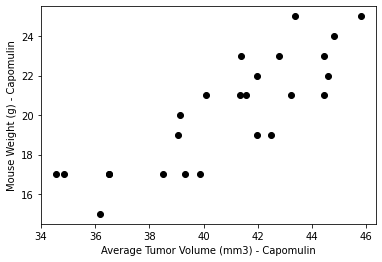

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = capomulin_mice_df["Weight (g)_mean"].tolist()
mean_tumor_vol = capomulin_mice_df["Tumor_Vol_mean"].tolist()

plt.scatter(mean_tumor_vol, mouse_weight, marker="o", color="black")
plt.xlabel('Average Tumor Volume (mm3) - Capomulin')
plt.ylabel('Mouse Weight (g) - Capomulin')
plt.show()


## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, mean_tumor_vol)
print(f"The correlation between Capomulin Mouse Weight and Average Tumor Volume is {round(correlation[0],2)}")

The correlation between Capomulin Mouse Weight and Average Tumor Volume is 0.84


The correlation between Capomulin Mouse Weight and Average Tumor Volume is 0.84
with an r-squared value of: 0.71


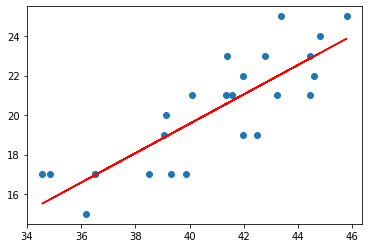

In [50]:
# Add the linear regression equation and line to plot

# converting list to array
tumorVol_mean_arr = np.array(mean_tumor_vol)
                  
x_values = tumorVol_mean_arr
y_values = mouse_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.figure(figsize=(20,10))
plt.annotate(line_eq,(36,23),fontsize=12,color="black")
plt.xlabel("Average Tumor Volume - Capomulin")
plt.ylabel("Mouse Weight (g) - Capomulin")
print(f"The correlation between Capomulin Mouse Weight and Average Tumor Volume is {round(correlation[0],2)}")
r_squared = round((rvalue**2),2)
print(f"with an r-squared value of: {r_squared}")

plt.show()